# QA page tool

## Goal

QA the events of clicks on page tools after the instrumentation updates in TICKET: [T332612](https://phabricator.wikimedia.org/T332612)

The instrumentation fix is only for clicks on links on page tools.

QAed on 2023-04-28

## QA clicks on tools menu

### Old event logging

In [4]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
library(tidyverse); 
library(lubridate); 
library(scales);
library(magrittr); 
library(dplyr);
})

In [5]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [6]:
options(repr.plot.width = 12, repr.plot.height = 8)

In [22]:
query_daily_clicks_old <- "
SELECT TO_DATE(meta.dt) AS event_date,  
REGEXP_EXTRACT(event.name, '^([-a-z]+)', 1) as link_name,
CASE WHEN event.name regexp '.unpinned$' THEN 'unpinned_tools' 
WHEN event.name regexp '.pinned$' THEN 'pinned_tools' 
END AS tool_location,
COUNT(DISTINCT event.token) AS event_tokens, count(1) AS clicks
FROM event.desktopwebuiactionstracking
WHERe year=2023
AND event.action='click'
AND event.name IN 
(
't-whatlinkshere.vector-page-tools.unpinned', 't-whatlinkshere.vector-page-tools.pinned',
't-recentchangeslinked.vector-page-tools.unpinned','t-recentchangeslinked.vector-page-tools.pinned',
't-specialpages.vector-page-tools.unpinned', 't-specialpages.vector-page-tools.pinned',
't-permalink.vector-page-tools.unpinned', 't-permalink.vector-page-tools.pinned',
't-info.vector-page-tools.unpinned', 't-info.vector-page-tools.pinned',
't-cite.vector-page-tools.unpinned', 't-cite.vector-page-tools.pinned',
't-wikibase.vector-page-tools.unpinned', 't-wikibase.vector-page-tools.pinned',
't-whowrotethat.vector-page-tools.unpinned', 't-whowrotethat.vector-page-tools.pinned',
'ca-delete.vector-page-tools.unpinned','ca-delete.vector-page-tools.pinned',
'ca-move.vector-page-tools.unpinned', 'ca-move.vector-page-tools.pinned',
'ca-unprotect.vector-page-tools.unpinned', 'ca-unprotect.vector-page-tools.pinned',
'coll-download-as-rl.vector-page-tools.unpinned', 'coll-download-as-rl.vector-page-tools.pinned',
't-print.vector-page-tools.unpinned', 't-print.vector-page-tools.pinned'
)
AND event.skin='vector-2022'
GROUP BY TO_DATE(meta.dt), REGEXP_EXTRACT(event.name, '^([-a-z]+)', 1) ,
CASE WHEN event.name regexp '.unpinned$' THEN 'unpinned_tools' 
WHEN event.name regexp '.pinned$' THEN 'pinned_tools' 
END 
"

In [23]:
df_daily_clicks_old <- wmfdata::query_hive(query_daily_clicks_old )

Don't forget to authenticate with Kerberos using kinit



In [24]:
df_daily_clicks_old$event_date <- as.Date(df_daily_clicks_old$event_date)

In [25]:
df_daily_clicks_old

event_date,link_name,tool_location,event_tokens,clicks
<date>,<chr>,<chr>,<int>,<int>
2023-03-18,t-info,pinned_tools,1,1
2023-01-28,ca-move,pinned_tools,71,114
2023-02-22,ca-move,unpinned_tools,117,220
2023-02-21,coll-download-as-rl,pinned_tools,430,1103
2023-02-27,t-specialpages,pinned_tools,262,306
2023-03-05,t-whatlinkshere,pinned_tools,518,1709
2023-03-11,t-print,unpinned_tools,80,148
2023-02-23,ca-unprotect,unpinned_tools,1,2
2023-03-18,coll-download-as-rl,unpinned_tools,1,1


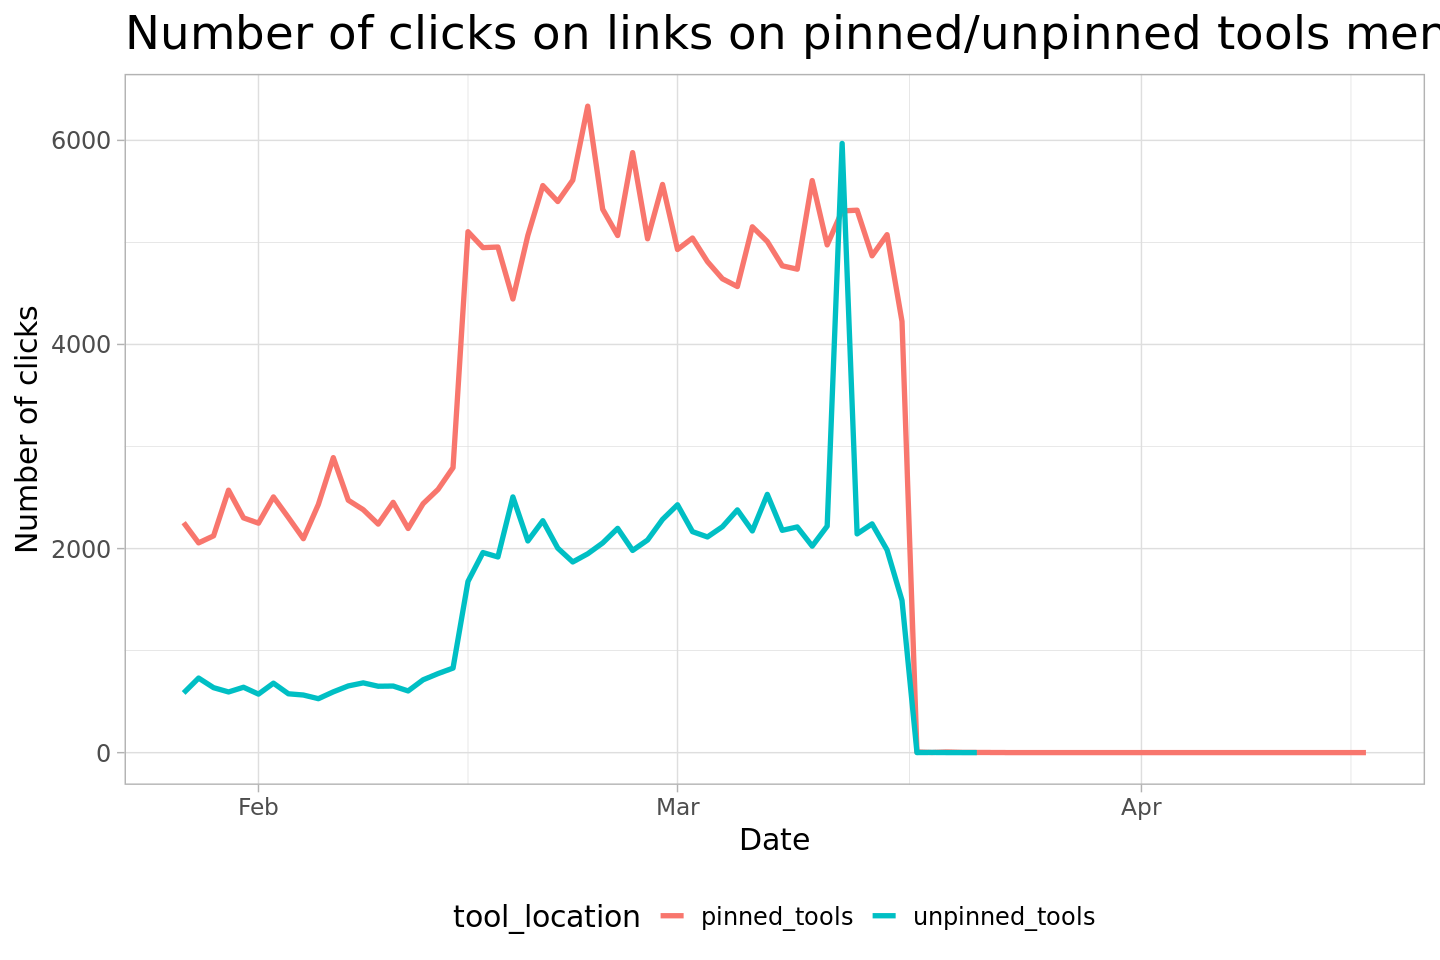

In [15]:
daily_click_old_g <- df_daily_clicks_old %>%
   group_by(event_date, tool_location ) %>%
   summarize(total_clicks=sum(clicks), .groups='drop') %>%
   # exclude the recent incompleted day
   # slice(1:(n() - 1)) %>%
   ggplot(mapping=aes(x=event_date, y=total_clicks, color=tool_location)) +
   geom_line( size = 1.5) +
  labs(title = 'Number of clicks on links on pinned/unpinned tools menu ',
     x = 'Date',
     y = 'Number of clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=28))
daily_click_old_g

In [26]:
df_daily_clicks_old %>%
 filter(link_name=='t-permalink') %>% 
 arrange(event_date)

event_date,link_name,tool_location,event_tokens,clicks
<date>,<chr>,<chr>,<int>,<int>
2023-01-28,t-permalink,unpinned_tools,5,9
2023-01-28,t-permalink,pinned_tools,47,59
2023-01-29,t-permalink,unpinned_tools,7,8
2023-01-29,t-permalink,pinned_tools,53,60
2023-01-30,t-permalink,unpinned_tools,15,19
2023-01-30,t-permalink,pinned_tools,69,91
2023-01-31,t-permalink,unpinned_tools,12,13
2023-01-31,t-permalink,pinned_tools,73,88
2023-02-01,t-permalink,unpinned_tools,5,5


In [44]:
df_daily_clicks_old %>%
 arrange(event_date)  %>%
 tail(5)

,event_date,link_name,tool_location,event_tokens,clicks
,<date>,<chr>,<chr>,<int>,<int>
1143,2023-03-22,t-info,pinned_tools,1,1
1144,2023-03-23,t-whatlinkshere,pinned_tools,1,1
1145,2023-03-25,t-info,pinned_tools,1,1
1146,2023-03-28,t-recentchangeslinked,pinned_tools,1,1
1147,2023-04-16,t-print,pinned_tools,1,1


#### Note
The events with old field value are not available since 2023-04-16

### New event logging

In [36]:
query_daily_clicks_new <- "
SELECT TO_DATE(meta.dt) AS event_date,  
REGEXP_EXTRACT(event.name, '^([-a-z]+)', 1) as link_name,
CASE WHEN event.name regexp '.page-tools-pinned-disabled$' THEN 'unpinned_tools' 
WHEN event.name regexp '.page-tools-pinned-enabled$' THEN 'pinned_tools' 
END AS tool_location,
COUNT(DISTINCT event.token) AS event_tokens, count(1) AS clicks
FROM event.desktopwebuiactionstracking
WHERe year=2023
AND event.action='click'
AND event.name IN 
(
't-whatlinkshere.page-tools-pinned-disabled','t-whatlinkshere.page-tools-pinned-enabled',
't-recentchangeslinked.page-tools-pinned-disabled','t-recentchangeslinked.page-tools-pinned-enabled',
't-specialpages.page-tools-pinned-disabled','t-specialpages.page-tools-pinned-enabled',
't-permalink.page-tools-pinned-disabled','t-permalink.page-tools-pinned-enabled',
't-info.page-tools-pinned-disabled','t-info.page-tools-pinned-enabled',
't-cite.page-tools-pinned-disabled','t-cite.page-tools-pinned-enabled',
't-wikibase.page-tools-pinned-disabled','t-wikibase.page-tools-pinned-enabled',
'ca-delete.page-tools-pinned-disabled','ca-delete.page-tools-pinned-enabled',
'ca-move.page-tools-pinned-disabled','ca-move.page-tools-pinned-enabled',
'ca-unprotect.page-tools-pinned-disabled','ca-unprotect.page-tools-pinned-enabled',
'coll-download-as-rl.page-tools-pinned-disabled','coll-download-as-rl.page-tools-pinned-enabled',
't-print.page-tools-pinned-disabled','t-print.page-tools-pinned-enabled',
 't-whowrotethat.page-tools-pinned-disabled','t-whowrotethat.page-tools-pinned-enabled'
)
AND event.skin='vector-2022'
GROUP BY TO_DATE(meta.dt), REGEXP_EXTRACT(event.name, '^([-a-z]+)', 1) ,
CASE WHEN event.name regexp '.page-tools-pinned-disabled$' THEN 'unpinned_tools' 
WHEN event.name regexp '.page-tools-pinned-enabled$' THEN 'pinned_tools' 
END  
"

In [37]:
df_daily_clicks_new <- wmfdata::query_hive(query_daily_clicks_new )

Don't forget to authenticate with Kerberos using kinit



In [38]:
df_daily_clicks_new$event_date <- as.Date(df_daily_clicks_new$event_date)

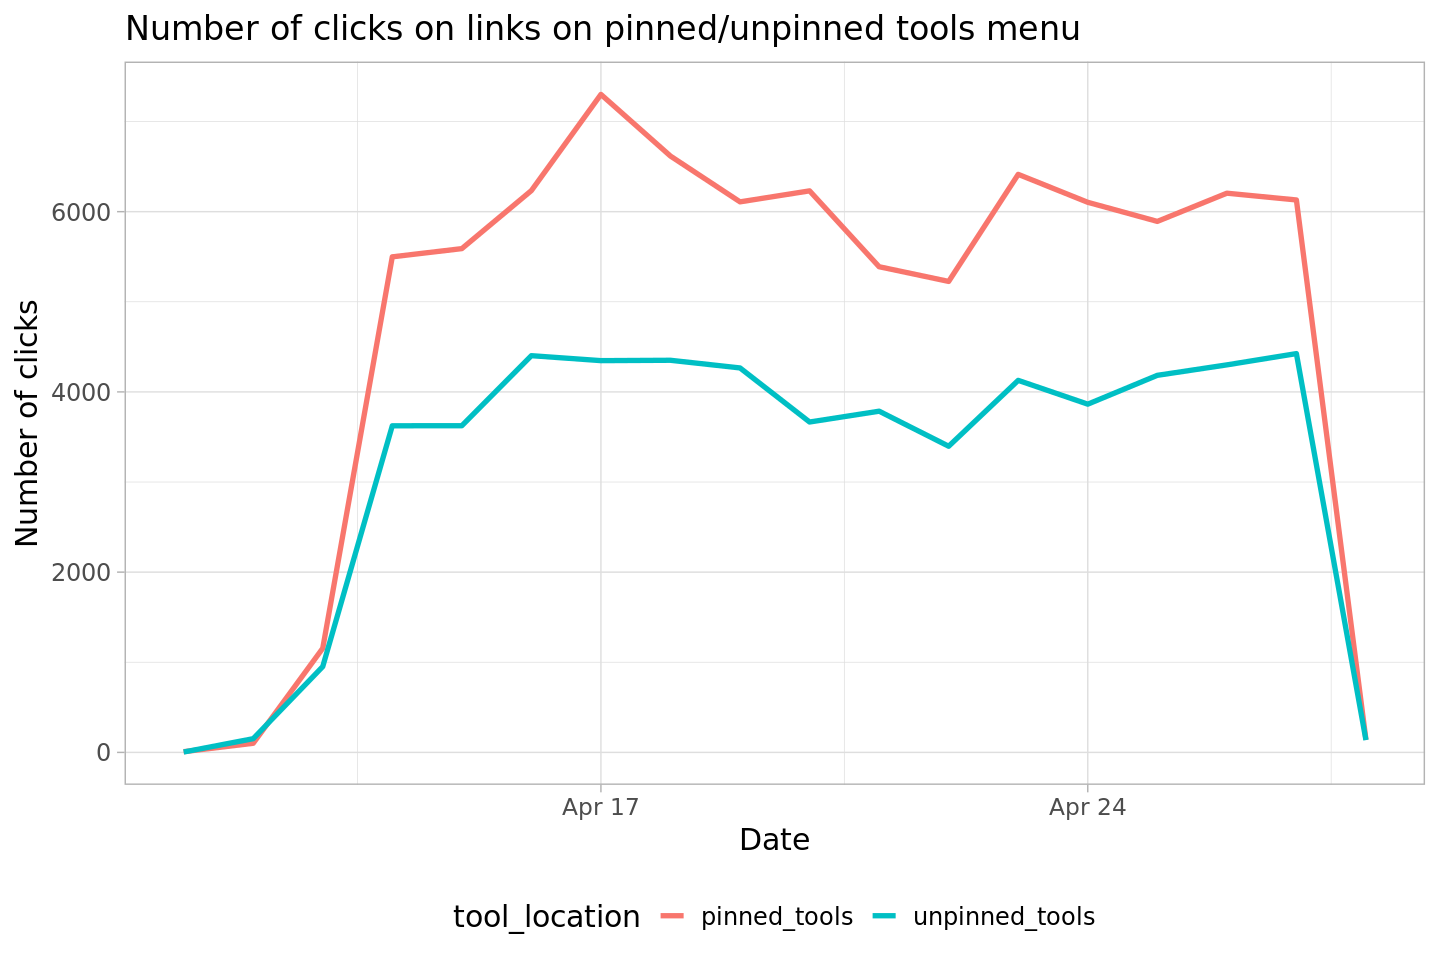

In [39]:
daily_click_new_g <- df_daily_clicks_new %>%
   group_by(event_date, tool_location ) %>%
   summarize(total_clicks=sum(clicks), .groups='drop') %>%
   # exclude the recent incompleted day
   # slice(1:(n() - 1)) %>%
   ggplot(mapping=aes(x=event_date, y=total_clicks, color=tool_location)) +
   geom_line( size = 1.5) +
  labs(title = 'Number of clicks on links on pinned/unpinned tools menu ',
     x = 'Date',
     y = 'Number of clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=20))
daily_click_new_g

In [40]:
df_daily_clicks_new %>%
  arrange(event_date) %>%
  head(10)

,event_date,link_name,tool_location,event_tokens,clicks
,<date>,<chr>,<chr>,<int>,<int>
1,2023-04-11,t-specialpages,pinned_tools,4,6
2,2023-04-11,t-info,pinned_tools,1,1
3,2023-04-11,coll-download-as-rl,unpinned_tools,1,1
4,2023-04-11,ca-move,pinned_tools,1,1
5,2023-04-11,t-specialpages,unpinned_tools,3,3
6,2023-04-12,t-cite,unpinned_tools,1,1
7,2023-04-12,t-specialpages,pinned_tools,9,10
8,2023-04-12,t-recentchangeslinked,pinned_tools,1,2
9,2023-04-12,t-info,pinned_tools,8,22


In [43]:
df_daily_clicks_new %>%
  arrange(event_date) %>%
  tail(5)

,event_date,link_name,tool_location,event_tokens,clicks
,<date>,<chr>,<chr>,<int>,<int>
397,2023-04-28,t-cite,unpinned_tools,2,2
398,2023-04-28,t-specialpages,pinned_tools,8,9
399,2023-04-28,t-recentchangeslinked,pinned_tools,5,5
400,2023-04-28,t-info,pinned_tools,16,17
401,2023-04-28,coll-download-as-rl,unpinned_tools,17,32


In [41]:
df_daily_clicks_new %>%
   group_by(link_name, tool_location ) %>%
   summarize(total_clicks=sum(clicks), .groups='drop') 

link_name,tool_location,total_clicks
<chr>,<chr>,<int>
ca-delete,pinned_tools,5105
ca-delete,unpinned_tools,2868
ca-move,pinned_tools,7278
ca-move,unpinned_tools,3641
ca-unprotect,pinned_tools,37
ca-unprotect,unpinned_tools,32
coll-download-as-rl,pinned_tools,11772
coll-download-as-rl,unpinned_tools,16060
t-cite,pinned_tools,1336


#### Note
- The events with new field value are avaiable since 2023-04-11.  
- The events of following links are confirmed to be captured: 
What links here,
Related changes,
Special pages,
Page information,
Cite this page,
Wikidata item,
Who Wrote That,
Delete,
Move,
Change protection,
Download as PDF,
Printable version.
- The events of clicks on `Who Wrote That` are not logged. It's expected.